In [190]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt

In [191]:
df_train = pd.read_csv('../../data_preprocess_v2/train_df_day_5_1.csv')
df_test = pd.read_csv('../../data_preprocess_v2/test_df_day_5_1.csv')

In [178]:
# normalise
independe_var = ['Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)',\
                     'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
df_train[independe_var] = (df_train[independe_var]-df_train[independe_var].min())/(df_train[independe_var].max()-df_train[independe_var].min())
df_test[independe_var] = (df_test[independe_var]-df_test[independe_var].min())/(df_test[independe_var].max()-df_test[independe_var].min())

In [192]:
# split X and y

train_X = df_train[independe_var]
train_y_close = df_train['Close (t)']
train_y_movement = df_train['movement']

test_X = df_test[independe_var]
test_y_close = df_test['Close (t)']
test_y_movement = df_test['movement']

In [193]:
# design network
inputs = keras.Input(shape=(10, 1))
hidden1 = layers.LSTM(50)(inputs)
hidden2 = layers.Dense(50, activation='relu')(hidden1)
hidden3 = layers.Dense(50, activation='relu')(hidden2)
outputs = layers.Dense(1)(hidden3)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_62 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_63 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 51        
Total params: 15,551
Trainable params: 15,551
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Save the model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

112/112 [==============================] - 3s 6ms/step - loss: 0.1014
Test RMSE: 1.242


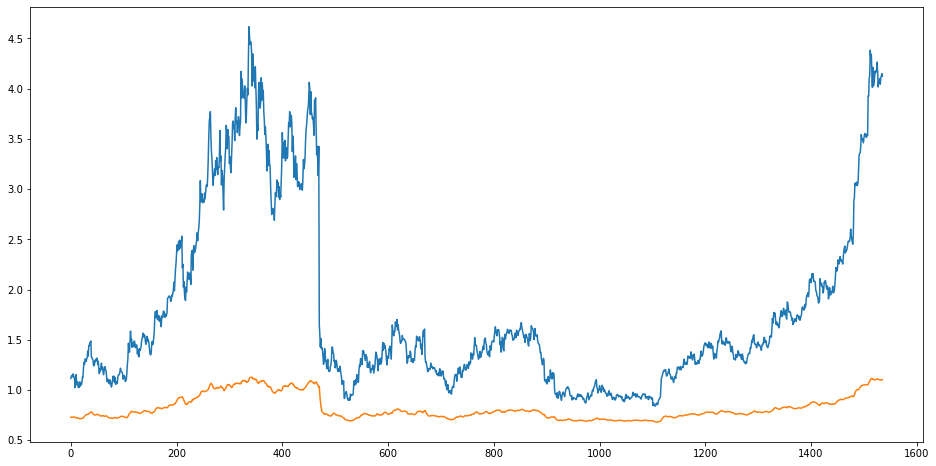

In [195]:
model.fit(train_X, train_y_close, shuffle=False)
predict_y_close = model.predict(test_X)
rmse = sqrt(mean_squared_error(test_y_close, predict_y_close))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test_y_close)
plt.plot(predict_y_close)

Test RMSE: 0.532


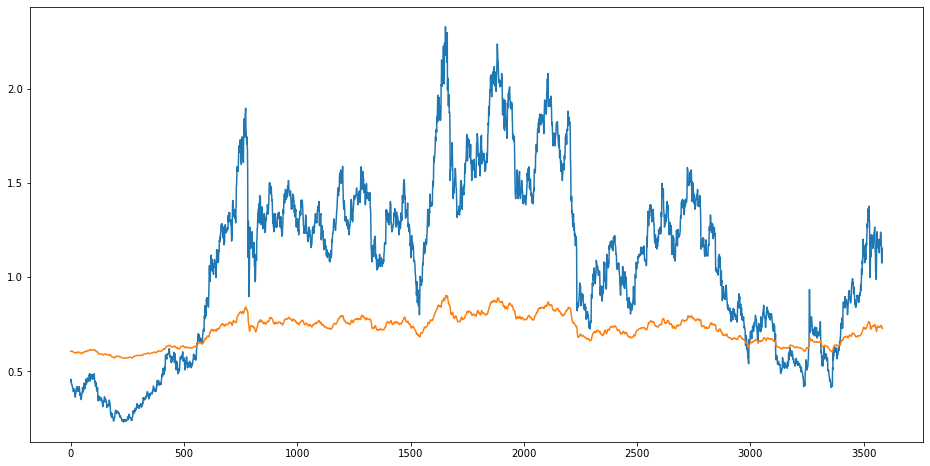

In [201]:
# predict for train data
predict_train_close = model.predict(train_X)

rmse = sqrt(mean_squared_error(train_y_close, predict_train_close))
print('Test RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(train_y_close)
plt.plot(predict_train_close)

In [202]:
# compute binary result
predict_y_movement = [0]

for i in range(0, len(predict_y_close) - 1):
    if predict_y_close[i] < predict_y_close[i + 1]:
        predict_y_movement.append(1)
    else:
        predict_y_movement.append(0)

In [203]:
print(confusion_matrix(test_y_movement, predict_y_movement))
print('Precision: %.3f' % precision_score(test_y_movement, predict_y_movement))
print('Recall: %.3f' % recall_score(test_y_movement, predict_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_y_movement, predict_y_movement))
print('F1-score: %.3f' % f1_score(test_y_movement, predict_y_movement))

[[337 438]
 [382 379]]
Precision: 0.464
Recall: 0.498
Accuracy: 0.466
F1-score: 0.480
